In [1]:
import csv
import numpy as np
from collections import defaultdict
from matplotlib import pyplot
import pandas

In [2]:
BLANKS=["","RBNF1", "RBNF2", "RBNF", "0", "RBNF 1", "RBNF 2"]
#TOTAL= 5048
#TOTAL=2734
#TOTAL=1351
#TOTAL=1201
#TOTAL=1168
TOTAL=996
#TOTAL=194

In [3]:
def loadCsvData(fileName):
	matrix = []
	# open a file
	with open(fileName) as f:
		reader = csv.reader(f)

		# loop over each row in the file
		for row in reader:

			# cast each value to a float
			doubleRow = []
			for value in row:
				doubleRow.append(value.strip())

			# store the row into our matrix
			matrix.append(doubleRow)
	return matrix

In [4]:
def printData(matrix):
	for row in matrix:
		print (row)

In [7]:
data= loadCsvData("data/metadata.csv")

In [8]:
myfile = open("data/everything_but_falsehits_and_needsreview.txt")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    if not i.find("Files\\\\HM\\\\HM_")==-1:
        files.append(i[14:].strip())
hmnames=set()
for i in files:
    ind=i.find("_")
    name=i[:ind]+', '+i[ind+1:-1]
    name=name.replace('_', ' ')
    hmnames.add(name)


In [9]:
data=pandas.DataFrame(data[1:], columns=data[0])

In [10]:
database=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    #if not data["collection_id"][i]== "HM":
    #    continue
    #if data["interviewee_name"][i] not in names:
    #    continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        database[i][atr]=value
print(database)

defaultdict(<function <lambda> at 0x7f855283ad08>, {0: defaultdict(<function <lambda>.<locals>.<lambda> at 0x7f855283af28>, {'\ufeffbirth_decade': '1890', 'identified_race': 'Black or African American', 'marital_status_at_interview_time': 'Married (except if separated)', 'education': 'High school graduate', 'sex': 'Female', 'interviewee_name': 'Abbott, Jessie', '': '', 'approximate_age_at_time_of_interview': '80', 'collection_id': 'BWOH', 'interviewee_id': 'VEE0'}), 1: defaultdict(<function <lambda>.<locals>.<lambda> at 0x7f8552849048>, {'\ufeffbirth_decade': '1890', 'identified_race': 'Black or African American', 'marital_status_at_interview_time': 'Widowed', 'education': "Bachelor's degree", 'sex': 'Female', 'interviewee_name': 'Adair, Christia', '': '', 'approximate_age_at_time_of_interview': '84', 'collection_id': 'BWOH', 'interviewee_id': 'VEE1'}), 2: defaultdict(<function <lambda>.<locals>.<lambda> at 0x7f85528490d0>, {'\ufeffbirth_decade': '1900', 'identified_race': 'Black or Af

In [11]:
dataformatted=defaultdict(lambda: defaultdict(lambda:0))
for i in database : 
    if database[i]["sex"]=="Male":
        continue
    for atr in database[i]:
        if atr== "interviewee_name":
            continue
        value= database[i][atr]
        if value not in BLANKS:
            dataformatted[atr][value]+=1
for cat in dataformatted:
    total=0
    for x in dataformatted[cat]:
        total+= dataformatted[cat][x]
    dataformatted[cat]["No Info"]= TOTAL-total

        
    
        

In [12]:
for table in dataformatted:
    for x,y in dataformatted[table].items():
        print("{}: {}".format(x,y))
        #print(x)
        #print(y)

1890: 64
1900: 109
1910: 288
1880: 13
1930: 466
1870: 2
1940: 608
1920: 455
1950: 396
1980: 41
1960: 184
1970: 67
1990: 8
1970-1980: 1
1950s: 1
1940s: 1
No Info: -1708
Black or African American: 1201
White: 1351
Asian: 42
Hispanic/Latinx: 29
Other Race: 5
Two or More Races: 27
Indigenous American or Alaska Native: 67
No Info: -1726
Married (except if separated): 970
Widowed: 247
Divorced: 154
Never married: 72
Separated: 3
Single: 52
Domestic Partner: 1
Common Law: 1
No Info: -504
High school graduate: 205
Bachelor's degree: 638
Graduate or professional degree: 1168
Associate's degree: 36
Some college: 412
9th to 12th grade but no diploma: 114
Less than 9th grade: 41
No Info: -1618
Female: 2734
No Info: -1738
80: 37
84: 31
75: 46
86: 31
81: 39
62: 43
79: 32
76: 62
88: 18
83: 26
78: 35
71: 116
74: 43
64: 44
90: 27
77: 39
82: 27
85: 23
94: 14
43: 10
72: 43
66: 42
67: 44
73: 44
91: 26
65: 50
93: 11
61: 54
63: 62
60: 45
92: 13
68: 40
104: 2
47: 16
59: 34
27: 2
49: 20
55: 36
45: 12
44: 16
1

VEE1532: 1
VEE1543: 1
VEE1548: 1
VEE1550: 1
VEE1576: 1
VEE1580: 1
VEE1581: 1
VEE1593: 1
VEE1596: 1
VEE1597: 1
VEE1598: 1
VEE1599: 1
VEE1600: 1
VEE1601: 1
VEE1602: 1
VEE1603: 1
VEE1604: 1
VEE1605: 1
VEE1606: 1
VEE1607: 1
VEE1608: 1
VEE1609: 1
VEE1610: 1
VEE1613: 1
VEE1614: 1
VEE1615: 1
VEE1616: 1
VEE1624: 1
VEE1630: 1
VEE1633: 1
VEE1638: 1
VEE1639: 1
VEE1642: 1
VEE1645: 1
VEE1649: 1
VEE1650: 1
VEE1651: 1
VEE1654: 1
VEE1655: 1
VEE1656: 1
VEE1657: 1
VEE1659: 1
VEE1663: 1
VEE1664: 1
VEE1665: 1
VEE1666: 1
VEE1673: 1
VEE1675: 1
VEE1677: 1
VEE1678: 1
VEE1679: 1
VEE1682: 1
VEE1684: 1
VEE1687: 1
VEE1688: 1
VEE1689: 1
VEE1695: 1
VEE1699: 1
VEE1700: 1
VEE1704: 1
VEE1706: 1
VEE1708: 1
VEE1711: 1
VEE1712: 1
VEE1717: 1
VEE1718: 1
VEE1719: 1
VEE1720: 1
VEE1722: 1
VEE1724: 1
VEE1725: 1
VEE1727: 1
VEE1732: 1
VEE1734: 1
VEE1735: 1
VEE1736: 1
VEE1741: 1
VEE1742: 1
VEE1743: 1
VEE1746: 1
VEE1747: 1
VEE1749: 1
VEE1750: 1
VEE1754: 1
VEE1756: 1
VEE1757: 1
VEE1758: 1
VEE1760: 1
VEE1761: 1
VEE1764: 1
VEE1765: 1

VEE4139: 1
VEE4141: 1
VEE4143: 1
VEE4144: 1
VEE4145: 1
VEE4146: 1
VEE4147: 1
VEE4153: 1
VEE4154: 1
VEE4156: 1
VEE4163: 1
VEE4164: 1
VEE4165: 1
VEE4171: 1
VEE4175: 1
VEE4177: 1
VEE4178: 1
VEE4181: 1
VEE4182: 1
VEE4185: 1
VEE4186: 1
VEE4194: 1
VEE4204: 1
VEE4205: 1
VEE4210: 1
VEE4215: 1
VEE4217: 1
VEE4218: 1
VEE4220: 1
VEE4222: 1
VEE4223: 1
VEE4225: 1
VEE4227: 1
VEE4228: 1
VEE4230: 1
VEE4233: 1
VEE4235: 1
VEE4236: 1
VEE4238: 1
VEE4240: 1
VEE4242: 1
VEE4244: 1
VEE4247: 1
VEE4250: 1
VEE4251: 1
VEE4252: 1
VEE4254: 1
VEE4255: 1
VEE4257: 1
VEE4259: 1
VEE4263: 1
VEE4264: 1
VEE4268: 1
VEE4273: 1
VEE4276: 1
VEE4277: 1
VEE4280: 1
VEE4290: 1
VEE4291: 1
VEE4292: 1
VEE4294: 1
VEE4298: 1
VEE4299: 1
VEE4304: 1
VEE4307: 1
VEE4308: 1
VEE4310: 1
VEE4312: 1
VEE4313: 1
VEE4316: 1
VEE4319: 1
VEE4320: 1
VEE4321: 1
VEE4325: 1
VEE4326: 1
VEE4327: 1
VEE4328: 1
VEE4329: 1
VEE4332: 1
VEE4333: 1
VEE4336: 1
VEE4337: 1
VEE4346: 1
VEE4348: 1
VEE4350: 1
VEE4356: 1
VEE4365: 1
VEE4368: 1
VEE4371: 1
VEE4375: 1
VEE4376: 1

In [13]:
def checkAProfile(data, race, sex, education, birthdecade, exact):
    total=0
    attr=[("identified_race", race), ("sex", sex), ("education", education), ("\ufeffbirth_decade", birthdecade)]
    for i in data: 
        if exact:
            skip=False
            for a in attr:
                if data[i][a[0]] in BLANKS and a[1] != "":
                    skip=True
            if skip:
                continue
        skip=False   
        for a in attr:
            cat= data[i][a[0]]
            if a[1] != "" and cat not in BLANKS and cat != a[1]:
                skip=True
        if skip:
            continue
        total+=1
    return total
    
    

In [12]:
print(checkAProfile(database, "White", "Female", "Graduate or professional degree", "1940", True))

163


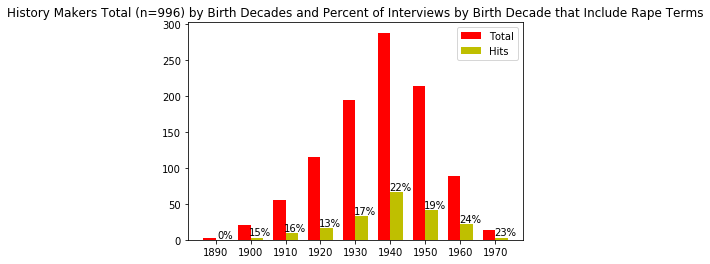

In [14]:
N = 9
total = (3, 20, 56, 115, 194, 288, 214, 89, 13)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, total, width, color='r')

hits = (0, 3, 9, 16, 33, 66, 42, 22, 3)
rects2 = ax.bar(ind + width, hits, width, color='y')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Number')
ax.set_title('History Makers Total (n=996) by Birth Decades and Percent of Interviews by Birth Decade that Include Rape Terms')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))

ax.legend((rects1[0], rects2[0]), ('Total', 'Hits'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for i in range(len(total)):
        rect=rects[i]
        height = rect.get_height()*.95
        frac = hits[i]/total[i]
        ax.text(rect.get_x() + rect.get_width()/1.25, 1.05*height,
                str(int(frac*100))+"%",
                ha='center', va='bottom')

autolabel(rects2)

pyplot.show()

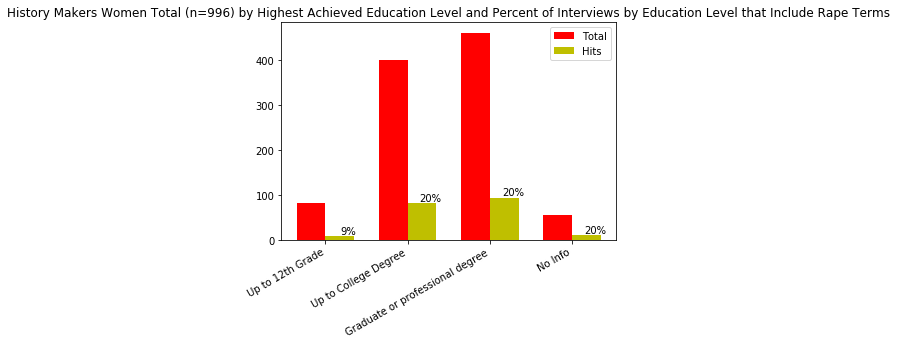

In [14]:
N = 4
total = (5+76+1, 304+95, 460, 55)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, total, width, color='r')

hits = (1+7+0,65+16,94,11)
rects2 = ax.bar(ind + width, hits, width, color='y')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Number')
ax.set_title('History Makers Women Total (n=996) by Highest Achieved Education Level and Percent of Interviews by Education Level that Include Rape Terms')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Up to 12th Grade', 'Up to College Degree', 'Graduate or professional degree', 'No Info'))

ax.legend((rects1[0], rects2[0]), ('Total', 'Hits'))

pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

autolabel(rects2)


pyplot.show()

History Makers Women Total (n=996) by Highest Achieved Education Level and Percent of Interviews by Education Level that Include Rape Terms

Left axis: number of interviews
X axis: educational level (up to high school graduate, up to college graduate, further schooling, no info)

Red: Number within female HM as a whole
Yellow: Only the interviews in the rape cluster

Percetages: What percentage of female HM in the given birth decade are in the rape cluster

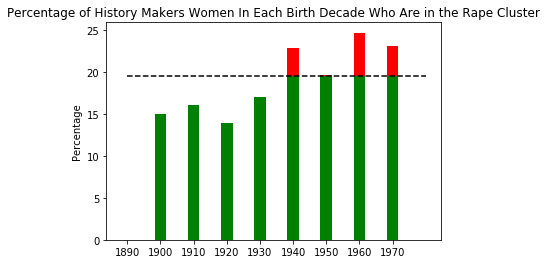

In [15]:
N = 9

ind = np.arange(N) 

# some example data
threshold = 19.5
values = np.array([0, 15, 16.1, 13.9, 17.0, 22.9, 19.6, 24.7, 23.1])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = pyplot.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Percentage of History Makers Women In Each Birth Decade Who Are in the Rape Cluster')
ax.set_ylabel('Percentage')


# horizontal line indicating the threshold
ax.plot([0., 9], [threshold, threshold], "k--")



fig.savefig("look-ma_a-threshold-plot.png")

Percentage of History Makers Women In Each Birth Decade Who Are in the Rape Cluster
Left axis: Percent of HM interviews in a given birthdecade who are in the rape cluster (ie, a 20 in 1950 means 20% of female HM born in the 1950s are in the rape cluster)
X axis: birth cohorts

Horizontal line: % of female HM interviews in the rape cluster as a whole

Red: portion above average (mostly for contrast)
green: portion up to average

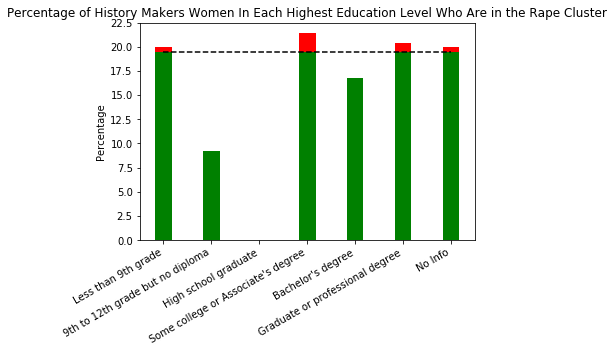

In [16]:
N = 7

ind = np.arange(N) 

# some example data
threshold = 19.5
values = np.array([20, 9.2, 0, 21.4, 16.8, 20.4, 20])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = pyplot.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('Less than 9th grade', '9th to 12th grade but no diploma', 'High school graduate', 'Some college or Associate\'s degree', 'Bachelor\'s degree', 'Graduate or professional degree', 'No Info'))
ax.set_title('Percentage of History Makers Women In Each Highest Education Level Who Are in the Rape Cluster')
ax.set_ylabel('Percentage')


# horizontal line indicating the threshold
ax.plot([0., 6], [threshold, threshold], "k--")
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')



fig.savefig("look-ma_a-threshold-plot.png")

Percentage of History Makers Women In Each Educational status Who Are in the Rape Cluster
Left axis: Percent of HM interviews in a given education group who are in the rape cluster (ie, a 20 in kless than 9th grade means 20% of female HM born with less than a 9th grade education are in the rape cluster)
X axis: educational leve;s

Horizontal line: % of female HM interviews in the rape cluster as a whole

Red: portion above average (mostly for contrast)
green: portion up to average

(Not up to date with three category system, but I think this has been ruled a bad presentation format and so is not worth updating)

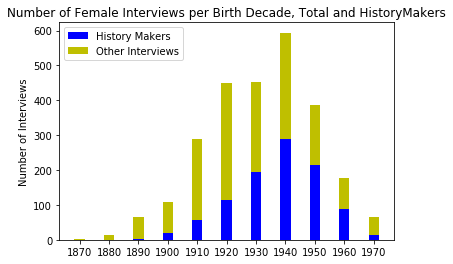

In [17]:
N = 11

ind = np.arange(N) 

# some example data
threshold = 19.5
values = np.array([0, 0, 3, 20, 56, 115, 194, 288, 214, 89, 13])
totals= np.array([2, 13, 64, 108, 288, 450, 453, 594, 387, 176, 64])
x = range(len(values))

# split it up
above_threshold = totals - values
below_threshold = values

# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(x, below_threshold, 0.35, color="b")
other=ax.bar(x, above_threshold, 0.35, color="y",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Number of Female Interviews per Birth Decade, Total and HistoryMakers')
ax.set_ylabel('Number of Interviews')
ax.legend((hm, other), ('History Makers', 'Other Interviews'))


# horizontal line indicating the threshold
#ax.plot([0., 9], [threshold, threshold], "k--")



fig.savefig("look-ma_a-threshold-plot.png")

Number of Female Interviews per Birth Decade, Total and HistoryMakers

Left axis: number of interviews
X axis: birth decade

blue: only HM
Yellow: all non-HM interviews

In [18]:
myfile = open("everything_but_falsehits_and_needsreview.txt")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    if not i.find("Files\\\\")==-1:
        if not i.find("_")==-1:
            files.append(i.strip())
names=set()
for i in files:
    i=i[i.find("_")+1:]
    ind=i.find("_")
    name=i[:ind]+', '+i[ind+1:-1]
    name=name.replace('_',' ')
    #if not name.find('(') == -1:
    #    name=name[:name.find('(')]
    name = ''.join([x for x in name if not x.isdigit()])
    names.add(name.strip())

In [19]:
database=defaultdict(lambda: defaultdict(lambda:0))
list_of_missing=[]
for i in range(len(data)):
    #if not data["collection_id"][i]== "HM":
    #    continue
    if data["interviewee_name"][i] not in names:
        list_of_missing.append(data["interviewee_name"][i])
        continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        database[i][atr]=value

In [20]:
metadata= loadCsvData("metadata.csv")

In [21]:
interviewtxt =loadCsvData("interview text fille to ids.csv")

In [22]:
metadata=pandas.DataFrame(metadata[1:], columns=metadata[0])

In [23]:
interviewtxt=pandas.DataFrame(interviewtxt[1:], columns=interviewtxt[0])

In [24]:
text_to_ids={}
for i in range(len(interviewtxt)):
    name=interviewtxt.at[i, interviewtxt.columns[0]]
    name=name[:name.rfind('.')]
    name=name.replace('\'','_')
    text_to_ids[name]=interviewtxt["interviewee_ids"][i].split(';')


In [33]:
ids_to_decade_and_education=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(database)):
    ids=database[i]["interviewee_id"]
    ids_to_decade_and_education[ids]["birth_decade"]=database[i]["\ufeffbirth_decade"]
    ids_to_decade_and_education[ids]["education"]=database[i]["education"]
    print(database[i]["collection_id"])
    ids_to_decade_and_education[ids]["collection"]=database[i]["collection_id"]

BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWOH
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP
BWSP


OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWDB
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
OWHF
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH
SOOH


HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM
HM




In [26]:
myfile = open("everything_but_falsehits_and_needsreview.txt")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    num= i.find("Files\\\\")
    if not num==-1:
        if not i.find("_")==-1:
            files.append(i.strip())
names=set()
for i in files:
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())
print(names)

{'RTRB_Henssler_Margaret', 'HM_Harris-Perry_Melissa', 'HM_Ray_Fay', 'HM_Biggins_J.', 'RTRB_Overton_Bonnie', 'UNCTWMS_Ray_Gloria', 'WOL_Collins_Jan', 'SCVF_Fried_Marlene_Gerber', 'UNCTWMS_Rollins_Sheryl_Clark', 'HM_Hunter-Gault_Charlayne', 'HM_Cunningham_Evelyn', 'HM_Frazier_Frances', 'SCVF_Hollibaugh_Amber', 'HM_Amoore_Renee', 'HM_Bacon_Gloria', 'HM_Toote_Gloria', 'UNCTWMS_Gruelle_Kit', 'BWOH_Adams_Kathleen', 'BWSP_Baumgarten_Sylvia', 'SCAP_Hazeltine_Glenna', 'HM_Robinson_Robin', 'BWSP_Desai_Tejal', 'RTRB_Esser_Edythe', 'UNCTWMS_Barrett_Margaret_Bowers', 'UNCTWMS_Stokes_Jeanette', 'UNCSW_Simkins_Modjeska_Monteith_1', 'OWHF_Ross_Cindy', 'HM_Jackson_Valerie', 'HM_Jefferson_Margo', 'SCAP_McNulty_Molly', 'HM_John_Bonnie', 'HM_McCabe_Jewell', 'HM_Abrams_Roz', 'HM_Simmons_Debra', 'UNCTWMS_Evans_Gaye', 'HM_Braun_Carol', 'WOL_Hamilton_Rebecca', 'UNCSW_Simkins_Modjeska_Monteith_2', 'HM_Bath_Patricia', 'BWSP_Chapman_Clarice', 'UNCTWMS_Elmore_Bessie', 'HM_Ewing_Sylvia', 'RTRB_McCain_Beth', 'SCAAR

In [34]:
decadesinformation = defaultdict(lambda: defaultdict(lambda:0))
for i in names:
    for x in text_to_ids[i]:
        decadesinformation[ids_to_decade_and_education[x]["birth_decade"]]["total"]+=1
        print(ids_to_decade_and_education[x]["collection"])
        if ids_to_decade_and_education[x]["collection"]=="HM":
            decadesinformation[ids_to_decade_and_education[x]["birth_decade"]]["HM"]+=1

RTRB
HM
HM
HM
RTRB
UNCTWMS
WOL
SCVF
UNCTWMS
HM
HM
HM
SCVF
HM
HM
HM
UNCTWMS
BWOH
BWSP
SCAP
HM
BWSP
RTRB
UNCTWMS
UNCTWMS
UNCSW
OWHF
HM
HM
SCAP
HM
HM
HM
HM
UNCTWMS
HM
WOL
UNCSW
HM
BWSP
UNCTWMS
HM
RTRB
SCAARJ
HM
RTRB
BWOH
UNCSW
BWOH
UNCTWMS
HM
HM
HM
ONA; SOOH
HM
HM
BWSP
SCVF
HM
UNCTWMS
BWOH
HM
BWOH
UNCTWMS
UNCTWMS
HM
SCVF
HM
HM
HM
BWOH
HM
HM
SCAL
SCVF
HM
ROHA
HM
HM
BWOH
HM
HM
HM
HM
SCAP
UNCTWMS
HM
HM
SCVF
UNCTWMS
0
HM
HM
HM
HM
RTRB
OWHF
HM
HM
ROHA
HM
BWSP
BWSP
SHSA
UNCTWMS
HM
SCAP
SHSF
HM
SCVF
BWSP
HM
BWOH
SHSF
RTRB
UNCTWMS
HM
BWSP
BWSP
RTRB
HM
UNCTWMS
HM
HM
BWOH
HM
ROHA
HM
HM
HM
HM
UNCGAS
HM
HM
HM
HM
UNCTWMS
HM
UNCSW
HM
HM
OSS
HM
HM
SCAP
HM
SCVF
0
SCAARJ
BWSP
UNCTWMS
SCAARJ
UNCTWMS
ROHA
HM
HM
HM
SHSF
BWSP
SHSF
RTRB
HM
WOL
HM
HM
WOL
HM
SCVF
UNCTWMS
0
HM
BWOH
UNCTWMS
HM
RTRB
SCAL
SHSF
HM
WOL
HM
BWSP
RTRB
HM
UNCTWMS
UNCTWMS
HM
UNCSW
ROHA
SHSA
UNCTWMS
BWOH
HM
HM
HM
BWSP
HM
SCVF
HM
RTRB
SCVF
HM
HM
HM
SCAP
SCAP
UNCTWMS
UNCTWMS
UNCTWMS
HM
HM
HM
BWSP
HM
HM
SCVF
SCVF
BWOH
HM
HM
HM
SCVF
HM
HM
UNCTW

[ 0  0  3  9 18 36 73 51 24  3]
[  2  14  18  24  56  65 151  90  38  13]


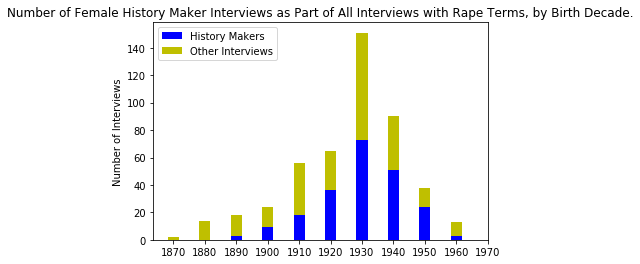

In [37]:
N = 11

ind = np.arange(N) 
values=[]
totals=[]

# some example data
for i in range(1880, 1980, 10):
    values.append(decadesinformation[str(i)]["HM"])
    totals.append(decadesinformation[str(i)]["total"])
    
values = np.array(values)
totals= np.array(totals)
print(values)
print(totals)

x = range(len(values))

# split it up
above_threshold = totals - values
below_threshold = values

# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(x, below_threshold, 0.35, color="b")
other=ax.bar(x, above_threshold, 0.35, color="y",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Number of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade.')
ax.set_ylabel('Number of Interviews')
ax.legend((hm, other), ('History Makers', 'Other Interviews'))


# horizontal line indicating the threshold
#ax.plot([0., 9], [threshold, threshold], "k--")



fig.savefig("look-ma_a-threshold-plot.png")

Number of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade

Left axis: number of interviews
X axis: birth decade

blue: only HM interviews in rape cluster
Yellow: all non-HM interviews in rape cluster